In [209]:
# Downloading dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/traffic-accident-prediction")
dataset = "dataset_traffic_accident_prediction1.csv"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\testk\.cache\kagglehub\datasets\denkuznetz\traffic-accident-prediction\versions\1


In [210]:
# Reading dataset with pandas

import pandas as pd
df = pd.read_csv(f'{path}/{dataset}', encoding = "ISO-8859-1")
df.head(20)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,NaN,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


In [211]:
# Dataset statistics

print(df.describe())
print(df.info())
print(df.isnull().values.any())

       Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
count       798.000000   798.000000          798.000000      798.000000   
mean          1.001253    71.050125            3.286967        0.160401   
std           0.784894    32.052458            2.017267        0.367208   
min           0.000000    30.000000            1.000000        0.000000   
25%           0.000000    50.000000            2.000000        0.000000   
50%           1.000000    60.000000            3.000000        0.000000   
75%           2.000000    80.000000            4.000000        0.000000   
max           2.000000   213.000000           14.000000        1.000000   

       Driver_Age  Driver_Experience    Accident  
count  798.000000         798.000000  798.000000  
mean    43.259398          38.981203    0.299499  
std     15.129856          15.273201    0.458326  
min     18.000000           9.000000    0.000000  
25%     30.000000          26.000000    0.000000  
50%     43.000000 

In [212]:
# Getting rid of NaN values either by placing mean of the column or dropping it entirely

# df['Driver_Experience'] = df['Driver_Experience'].fillna(df['Driver_Experience'].mean()).astype(int)
# df['Speed_Limit'] = df['Speed_Limit'].fillna(df['Speed_Limit'].mean()).astype(int)
# df['Number_of_Vehicles'] = df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean()).astype(int)
# df['Driver_Alcohol'] = df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mean()).astype(int)

# df = df.dropna()
# len(df)
# df

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, [0])
    ])

preprocessor.fit_transform(df)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [214]:
# One-Hot Encoding

weather = pd.get_dummies(df['Weather'])
table = pd.merge(
    left=df,
    right=weather,
    left_index=True,
    right_index=True,
)

road_type = pd.get_dummies(table['Road_Type'])
table = pd.merge(
    left=table,
    right=road_type,
    left_index=True,
    right_index=True,
)

time_of_day = pd.get_dummies(table['Time_of_Day'])
table = pd.merge(
    left=table,
    right=time_of_day,
    left_index=True,
    right_index=True,
)

road_condition = pd.get_dummies(table['Road_Condition'])
table = pd.merge(
    left=table,
    right=road_condition,
    left_index=True,
    right_index=True,
)

day_light_condition = pd.get_dummies(table['Road_Light_Condition'])
table = pd.merge(
    left=table,
    right=day_light_condition,
    left_index=True,
    right_index=True,
)

vehicle_type = pd.get_dummies(table['Vehicle_Type'])
table = pd.merge(
    left=table,
    right=vehicle_type,
    left_index=True,
    right_index=True,
)

del table['Weather']
del table['Road_Type']
del table['Time_of_Day']
del table['Road_Condition']
del table['Road_Light_Condition']
del table['Vehicle_Type']

table.columns



Index(['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
       'Driver_Alcohol', 'Accident_Severity', 'Driver_Age',
       'Driver_Experience', 'Accident', 'Clear', 'Foggy', 'Rainy', 'Snowy',
       'Stormy', 'City Road', 'Highway', 'Mountain Road', 'Rural Road',
       'Afternoon', 'Evening', 'Morning', 'Night', 'Dry', 'Icy',
       'Under Construction', 'Wet', 'Artificial Light', 'Daylight', 'No Light',
       'Bus', 'Car', 'Motorcycle', 'Truck'],
      dtype='object')

In [215]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
table['Accident_Severity']= label_encoder.fit_transform(table['Accident_Severity'])

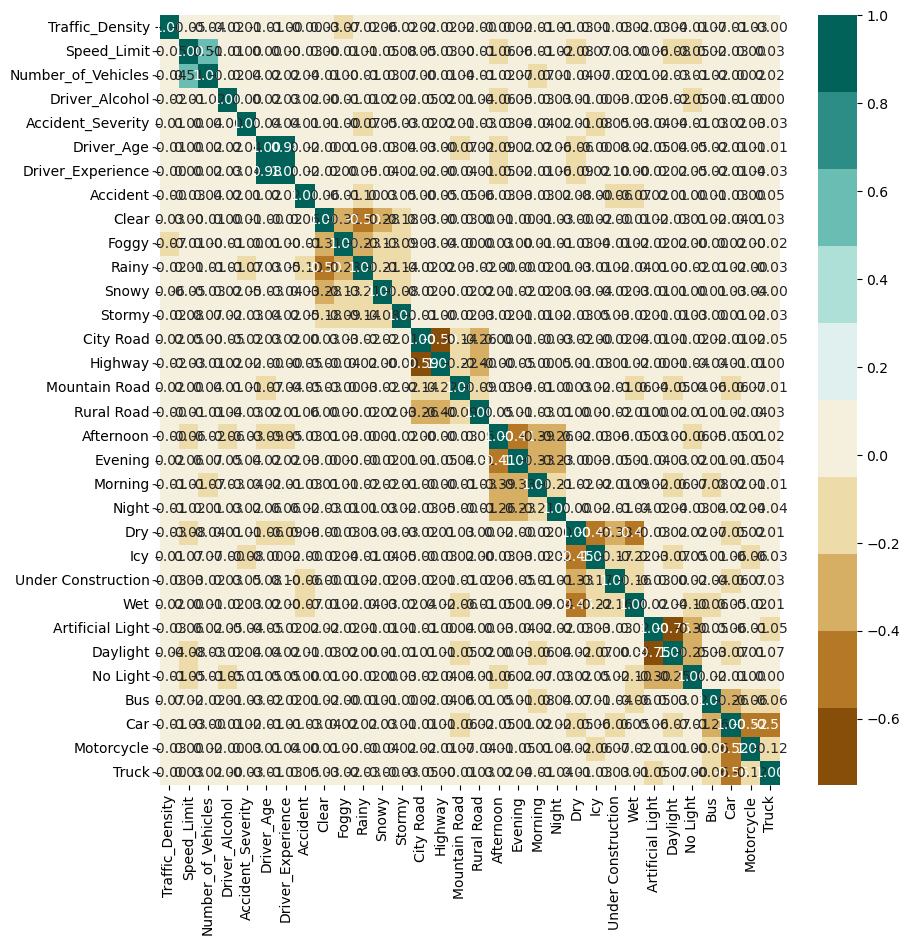

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = table.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [217]:
#Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
import sklearn.utils as skut

# train_x, test_x, train_y, test_y = train_test_split(table[['Traffic_Density', 'Speed_Limit',
#        'Number_of_Vehicles', 'Driver_Alcohol',
#        'Driver_Age', 'Driver_Experience',
#        'Clear', 'Foggy', 'Rainy', 'Snowy',
#        'Stormy', 'City Road', 'Highway', 'Mountain Road', 'Rural Road',
#        'Afternoon', 'Evening', 'Morning', 'Night', 'Dry', 'Icy',
#        'Under Construction', 'Wet', 'Artificial Light', 'Daylight', 'No Light',
#        'Bus', 'Car', 'Motorcycle', 'Truck']], table[['Accident']].astype(int), test_size=0.3, random_state=42)
train_x, test_x, train_y, test_y = train_test_split(table[['Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol',
       'Driver_Age', 'Driver_Experience']], table[['Accident_Severity']].astype(int), test_size=0.3, random_state=42)

In [218]:
train_x

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience
396,2.0,100.0,4.0,0.0,22.0,21.0
145,2.0,50.0,3.0,0.0,64.0,55.0
423,2.0,60.0,4.0,0.0,46.0,40.0
234,0.0,60.0,2.0,NaN,29.0,24.0
220,1.0,50.0,3.0,0.0,35.0,34.0
...,...,...,...,...,...,...
71,2.0,30.0,5.0,0.0,35.0,26.0
106,1.0,100.0,5.0,0.0,34.0,26.0
270,2.0,60.0,4.0,0.0,50.0,43.0
435,2.0,60.0,5.0,0.0,24.0,24.0


In [219]:
train_x.shape

(588, 6)

In [220]:
import numpy as np

y_len = len(train_y)
y_classes_len = np.bincount(train_y['Accident_Severity'])

w = y_len / (y_classes_len * 2)

w = {0: w[0], 1: w[1], 2: w[2]}

In [221]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, r2_score
from IPython.display import Markdown

METRICS = [
    (f1_score, "f1_score"),
    (precision_score, "precision_score"),
    (recall_score, "recall_score"),
    (r2_score, "r2_score")
]

In [222]:
def displmd(*args, **kwargs):
    display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

In [223]:
def validate(y_pred_test, y_pred_train, train_y, test_y, title="Model Evaluation"):
    outcomes = []

    for m, name in METRICS:
        outcomes.append([name, m(test_y, y_pred_test), m(train_y, y_pred_train)])

    df = pd.DataFrame(outcomes, columns=['metric', 'test', 'train'])
    df = df.set_index('metric')

    print(title)
    print(df)

    displmd(
        f"# {title}",
        f"## Valitation output",
        df.to_markdown()
    )
    
    cm_test = confusion_matrix(test_y, y_pred_test)
    cm_train = confusion_matrix(train_y, y_pred_train)

    fig, axs = plt.subplots(1, 2)

    # set size
    fig.set_size_inches(12, 5)

    axs[0].set_title('Test Confusion Matrix')
    axs[0].matshow(cm_test, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_test):
        axs[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    axs[1].set_title('Train Confusion Matrix')
    axs[1].matshow(cm_train, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_train):
        axs[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    plt.show()

In [224]:
w

{0: 5.157894736842105, 1: 0.8882175226586103, 2: 1.7710843373493976}

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso

In [226]:
# # First try
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

# model_svr_rbf = Pipeline([
#         ('norm', StandardScaler()),
#         ('regr', RandomForestClassifier(max_depth=7, class_weight="balanced", max_leaf_nodes=5, n_estimators=10))])

# w = np.array([w[i] for i in train_y['Accident']])
# model_svr_rbf.fit(train_x, np.array(train_y).reshape(-1), regr__sample_weight=w)

# validate(model_svr_rbf.predict(test_x), model_svr_rbf.predict(train_x), train_y, test_y, title="SVM - linear kernel")

In [227]:
from sklearn.calibration import LinearSVC
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest


def gen_model1():
    model = Pipeline([
        ('norm', StandardScaler()),
        ('regr', LinearRegression()),
    ])
    return model

model_gs1 = gen_model1()

params = [
    {
        'regr': [SVC()],
        'regr__kernel': ['linear', 'rbf', 'sigmoid'],
        'regr__C': [0.1, 0.2, 0.5, 1, 3],
    },{
        'regr': [RandomForestClassifier()],
        'regr__n_estimators': [20, 21, 22, 23, 24, 25, 26, 27],
        'regr__max_depth': [None, 2, 3, 4, 5, 6],
        'regr__min_samples_split': [8, 9, 10],
        'regr__min_samples_leaf': [1, 2, 3, 4],
    },{
        'regr': [DecisionTreeClassifier()],
        'regr__max_depth': [None, 2, 4, 7, 9],
        'regr__min_samples_split': [2, 4, 6, 8, 10],
        'regr__min_samples_leaf': [1, 4, 6, 8, 10],
    }
]

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model_gs1, params, cv=3, scoring='r2', n_jobs=-1)

grid.fit(train_x, np.array(train_y).reshape(-1))

c:\Users\testk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 2148.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\testk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\testk\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\testk\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.f

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('norm', StandardScaler()),
                                       ('regr', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'regr': [SVC()], 'regr__C': [0.1, 0.2, 0.5, 1, 3],
                          'regr__kernel': ['linear', 'rbf', 'sigmoid']},
                         {'regr': [RandomForestClassifier()],
                          'regr__max_depth': [None, 2, 3, 4, 5, 6],
                          'regr__min_samples_leaf': [1, 2, 3, 4],
                          'regr__min_samples_split': [8, 9, 10],
                          'regr__n_estimators': [20, 21, 22, 23, 24, 25, 26,
                                                 27]},
                         {'regr': [DecisionTreeClassifier()],
                          'regr__max_depth': [None, 2, 4, 7, 9],
                          'regr__min_samples_leaf': [1, 4, 6, 8, 10],
                          'regr__min_samples_split': [2, 4, 6, 8, 10]}],
             scoring='r2')

In [228]:
cvres = grid.cv_results_

cvresults = pd.DataFrame(cvres)

displmd(
    "# Grid search results - all data - all params",
    "## ",
    cvresults[["mean_test_score", "rank_test_score", "params"]]
    .sort_values(by="rank_test_score")
    .apply(lambda x: ({"test score": f"${x[0]:.5f}$", "params": f"`{x[2]}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)

C:\Users\testk\AppData\Local\Temp\ipykernel_25200\542408151.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .apply(lambda x: ({"test score": f"${x[0]:.5f}$", "params": f"`{x[2]}`"}), axis=1, result_type='expand') #type: ignore


# Grid search results - all data - all params

## 

|     | test score   | params                                                                                                                                           |
|----:|:-------------|:-------------------------------------------------------------------------------------------------------------------------------------------------|
| 236 | $-0.17364$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 3, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 8, 'regr__n_estimators': 25}`  |
| 186 | $-0.17364$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 8, 'regr__n_estimators': 23}`  |
| 189 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 8, 'regr__n_estimators': 26}`  |
| 124 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 9, 'regr__n_estimators': 25}`  |
| 195 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 9, 'regr__n_estimators': 24}`  |
| 118 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 8, 'regr__n_estimators': 27}`  |
| 191 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 9, 'regr__n_estimators': 20}`  |
| 116 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 8, 'regr__n_estimators': 25}`  |
| 188 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 8, 'regr__n_estimators': 25}`  |
| 184 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 8, 'regr__n_estimators': 21}`  |
| 182 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 10, 'regr__n_estimators': 27}` |
| 156 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 10, 'regr__n_estimators': 25}` |
| 178 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 10, 'regr__n_estimators': 23}` |
| 177 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 10, 'regr__n_estimators': 22}` |
| 161 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 8, 'regr__n_estimators': 22}`  |
| 174 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 9, 'regr__n_estimators': 27}`  |
| 173 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 9, 'regr__n_estimators': 26}`  |
| 283 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 3, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 8, 'regr__n_estimators': 24}`  |
| 162 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 8, 'regr__n_estimators': 23}`  |
| 163 | $-0.17735$   | `{'regr': RandomForestClassifier(), 'regr__max_depth': 2, 'regr__min_samples_leaf': 3, 'regr__min_samples_split': 8, 'regr__n_estimators': 24}`  |

In [229]:
# model_svr_rbf = Pipeline([
#         ('norm', StandardScaler()),
#         ('regr', Lasso(alpha=0.1))])

# w = np.array([w[i] for i in train_y['Accident']])
# model_svr_rbf.fit(train_x, np.array(train_y).reshape(-1), regr__sample_weight=w)

# validate(model_svr_rbf.predict(test_x), model_svr_rbf.predict(train_x), train_y, test_y, title="SVM - linear kernel")